***
<h1>Regression - Linear Regression & XGBoost Regression - Coffee Chain Analysis</h1>
<p>
The Dataset I have chosen is the Coffee Chain dataset, taken from Kaggle
    <ul>
        <li>This Dataset essentially contains multiple columns</li>
        <li>Area Cpde</li>
        <li>Ddate</li>
        <li>Market</li>
        <li>Market Size</li>
        <li>Product</li>
        <li>Product Type</li>
        <li>State</li>
        <li>Type</li>
        <li>Budget Cogs</li>
        <li>Budget Margin</li>
        <li>Budget Profit</li>
        <li>Budget Sales</li>
        <li>Coffee Sale</li>
        <li>Cogs</li>
        <li>Inventory</li>
        <li>Margin</li>
        <li>Marketing</li>
        <li>Number of Records</li>
        <li>Profit</li>
        <li>Total Expenses</li>
    </ul>
<a href='https://www.kaggle.com/datasets/qusaybtoush1990/coffee-chain'>https://www.kaggle.com/datasets/qusaybtoush1990/coffee-chain</a>
<br>
For this Dataset I plan to use Linear Regression to predict the Total Expenses of the Coffee Chain
</p>

***

## Table of Contents:
* [Imports](#imports)
* [Exploratory Data Analysis + Cleaning](#EDA)
* [PreProcess + Splitting the data](#pre)
* [Training + Compiling the models](#model)
* [Evaluating the Linear Regression model](#linear)
* [Evaluating the XGBoost Regression model](#xbg)
* [Evaluating the Decision Tree Regression model](#decision)

***

## Imports <a id="imports"></a>

In [95]:
# To begin, I started by importing my numpy and pandas libraries
# Numpy will assist with any arithemtics formulas or wrangling for the data
# pandas will assit in structuring our data, reading and presenting our outputs

import numpy as np
import pandas as pd

In [96]:
# Next, I imported the libraries I will be using for my data visualization
# Seaborn is a robust library that will assist in analyzing the data and presenting
# Matplotlib is also used for graph visualization

import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
# Importing preprocessing scalers, composer and pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import smogn

In [99]:
from sklearn.linear_model import LinearRegression
import xgboost as xg
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

In [100]:
from sklearn import metrics
import statsmodels.api as sm

In [101]:
from IPython.display import display, HTML

***

## Exploratory Data Analysis + Cleaning <a class="anchor" id="EDA"></a>

<p>
Now to begin.
<br><br>
First I create a url variable that will contain the url of the dataset, this way you should be able to run the code on your own machine.The dataset is living in a github I have created for my datasets. Once that is done, I then made use of the panda function "read_csv" to read my data and store it in a variable 'df' (dataframe). Then completed the cell by using the head() function to read and analyze the data
</p>

In [102]:
url = 'https://raw.githubusercontent.com/CleverJinn/DataScience/main/Datasets/Coffee%20Chain.csv'
df = pd.read_csv(url)
df.head()

,Area Code,Ddate,Market,Market Size,Product,Product Type,State,Type,Budget Cogs,Budget Margin,...,Budget Sales,Coffee Sales,Cogs,Inventory,Margin,Marketing,Number of Records,Number Of Records,Profit,Total Expenses
0,970,1/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,240,234,95,821,139,26,1,1,101,38
1,719,2/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,240,232,95,809,137,26,1,1,99,38
2,720,3/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,240,234,95,799,139,26,1,1,101,38
3,303,4/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,150,...,250,245,100,822,145,28,1,1,105,40
4,720,5/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,110,150,...,260,256,104,871,152,29,1,1,112,40


<p>
By analyzing the data, this gives me the overall idea on what I am working with. Since I plan to use Linear Regression to predict Total Expenses, I want to look at all the arthimetic variables that will effect the expenses. From the dataset we can also see a lot of categorical variables that we won't need for the model. We can also see an error in the dataset "Number of Records" variable is being repeated twice.
</p>

In [103]:
# Next analyzed the shape of the dataframe I created
# This will tells use the rows (data inputed) and columns (the variables)
df.shape

(4248, 21)

<p>
We can see there is a total 4248 of data in the this dataset and 21 variables acting as the columns.
</p>

In [104]:
# Next I used the info() function on the dataframe
# This will tell me all the variables in the dataset and display the datatypes they represent.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Area Code          4248 non-null   int64 
 1   Ddate              4248 non-null   object
 2   Market             4248 non-null   object
 3   Market Size        4248 non-null   object
 4   Product            4248 non-null   object
 5   Product Type       4248 non-null   object
 6   State              4248 non-null   object
 7   Type               4248 non-null   object
 8   Budget Cogs        4248 non-null   int64 
 9   Budget Margin      4248 non-null   int64 
 10  Budget Profit      4248 non-null   int64 
 11  Budget Sales       4248 non-null   object
 12  Coffee Sales       4248 non-null   int64 
 13  Cogs               4248 non-null   int64 
 14  Inventory          4248 non-null   object
 15  Margin             4248 non-null   int64 
 16  Marketing          4248 non-null   int64 


<p>
This confirms the cell before as we can see that there are indeed 21 columns. This also tells us all of their names and datatypes in a convenient format. I want all the int variables that will effect the expenese of the Coffee Chain
</p>

In [105]:
# After that I used the describe function to display a description of the arithmetic values in the datasets
df.describe()

,Area Code,Budget Cogs,Budget Margin,Budget Profit,Coffee Sales,Cogs,Margin,Marketing,Number of Records,Number Of Records,Profit,Total Expenses
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.0,4248.0,4248.000000,4248.000000
mean,582.278013,74.830508,100.819209,60.913371,192.987524,84.433145,104.293315,31.185028,1.0,1.0,61.097693,54.063559
std,221.140310,66.238145,92.602725,79.546123,151.133127,67.249769,94.342522,27.023264,0.0,0.0,101.708546,32.352598
min,203.000000,0.000000,-210.000000,-320.000000,17.000000,0.000000,-302.000000,0.000000,1.0,1.0,-638.000000,10.000000
25%,417.000000,30.000000,50.000000,20.000000,100.000000,43.000000,52.750000,13.000000,1.0,1.0,17.000000,33.000000
50%,573.000000,50.000000,70.000000,40.000000,138.000000,60.000000,76.000000,22.000000,1.0,1.0,40.000000,46.000000
75%,772.000000,90.000000,130.000000,80.000000,230.000000,100.000000,132.000000,39.000000,1.0,1.0,92.000000,65.000000
max,985.000000,450.000000,690.000000,560.000000,912.000000,364.000000,613.000000,156.000000,1.0,1.0,778.000000,190.000000


<p>
This will confirm with variables I will be using as my "X" values. This also confirms "Number of Records being repeated"
</p>

In [106]:
df = df.drop('Number of Records',axis=1)

<p>
I made the choice to drop the repeated column
</p>

In [107]:
df = df.drop('Number Of Records',axis=1)

<p>
Upon further consideration, I decided to drop the second column as well. The reason is, even though it being seen as an int, the it is representing a dummy variable and it not playing a direct role for the expenses.
</p>

In [108]:
df.describe()

,Area Code,Budget Cogs,Budget Margin,Budget Profit,Coffee Sales,Cogs,Margin,Marketing,Profit,Total Expenses
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,74.830508,100.819209,60.913371,192.987524,84.433145,104.293315,31.185028,61.097693,54.063559
std,221.140310,66.238145,92.602725,79.546123,151.133127,67.249769,94.342522,27.023264,101.708546,32.352598
min,203.000000,0.000000,-210.000000,-320.000000,17.000000,0.000000,-302.000000,0.000000,-638.000000,10.000000
25%,417.000000,30.000000,50.000000,20.000000,100.000000,43.000000,52.750000,13.000000,17.000000,33.000000
50%,573.000000,50.000000,70.000000,40.000000,138.000000,60.000000,76.000000,22.000000,40.000000,46.000000
75%,772.000000,90.000000,130.000000,80.000000,230.000000,100.000000,132.000000,39.000000,92.000000,65.000000
max,985.000000,450.000000,690.000000,560.000000,912.000000,364.000000,613.000000,156.000000,778.000000,190.000000


<p>
Ran another describe() function to confirm how everything looks before proceeding
</p>

In [109]:
df.columns

Index(['Area Code', 'Ddate', 'Market', 'Market Size', 'Product',
       'Product Type', 'State', 'Type', 'Budget Cogs', 'Budget Margin',
       'Budget Profit', 'Budget Sales', 'Coffee Sales', 'Cogs', 'Inventory',
       'Margin', 'Marketing', 'Profit', 'Total Expenses'],
      dtype='object')

<p>
Next I displayed the column names. This is purely for my benefit, so when I refer to columns I can copy the names from this cell, instead of risking syntax errors.
</p>

Area Code         0
Ddate             0
Market            0
Market Size       0
Product           0
Product Type      0
State             0
Type              0
Budget Cogs       0
Budget Margin     0
Budget Profit     0
Budget Sales      0
Coffee Sales      0
Cogs              0
Inventory         0
Margin            0
Marketing         0
Profit            0
Total Expenses    0
dtype: int64

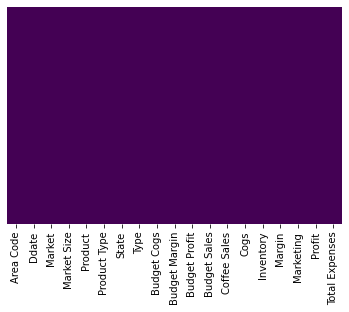

In [110]:
# Next is to check for any null values that could exist
# My process of checking is to the use the heatmap() function from Seaborn
# I then add the dataframe setting it to display only isnull() values
# Then I set the cmap to 'viridis' for my visual benefit
# The purple image will indicate values being detected
# Any yellow tints will indicate any null values being detected

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.isnull().sum()

<p>
If null values have been detected there are 3 ways to approach it
<ol>
    <li>Ignore it and carry one (not reccommended)</li>
    <li>Drop the variable with the null values, only if it is not playing role in the model</li>
    <li>Use average to predicted the potential values for the null values, then insert the predicted value in place of the nulls</li>
</ol>
Fortunately the dataset I am using does not have null values, according to the heatmap, so now I can carry on.
</p>

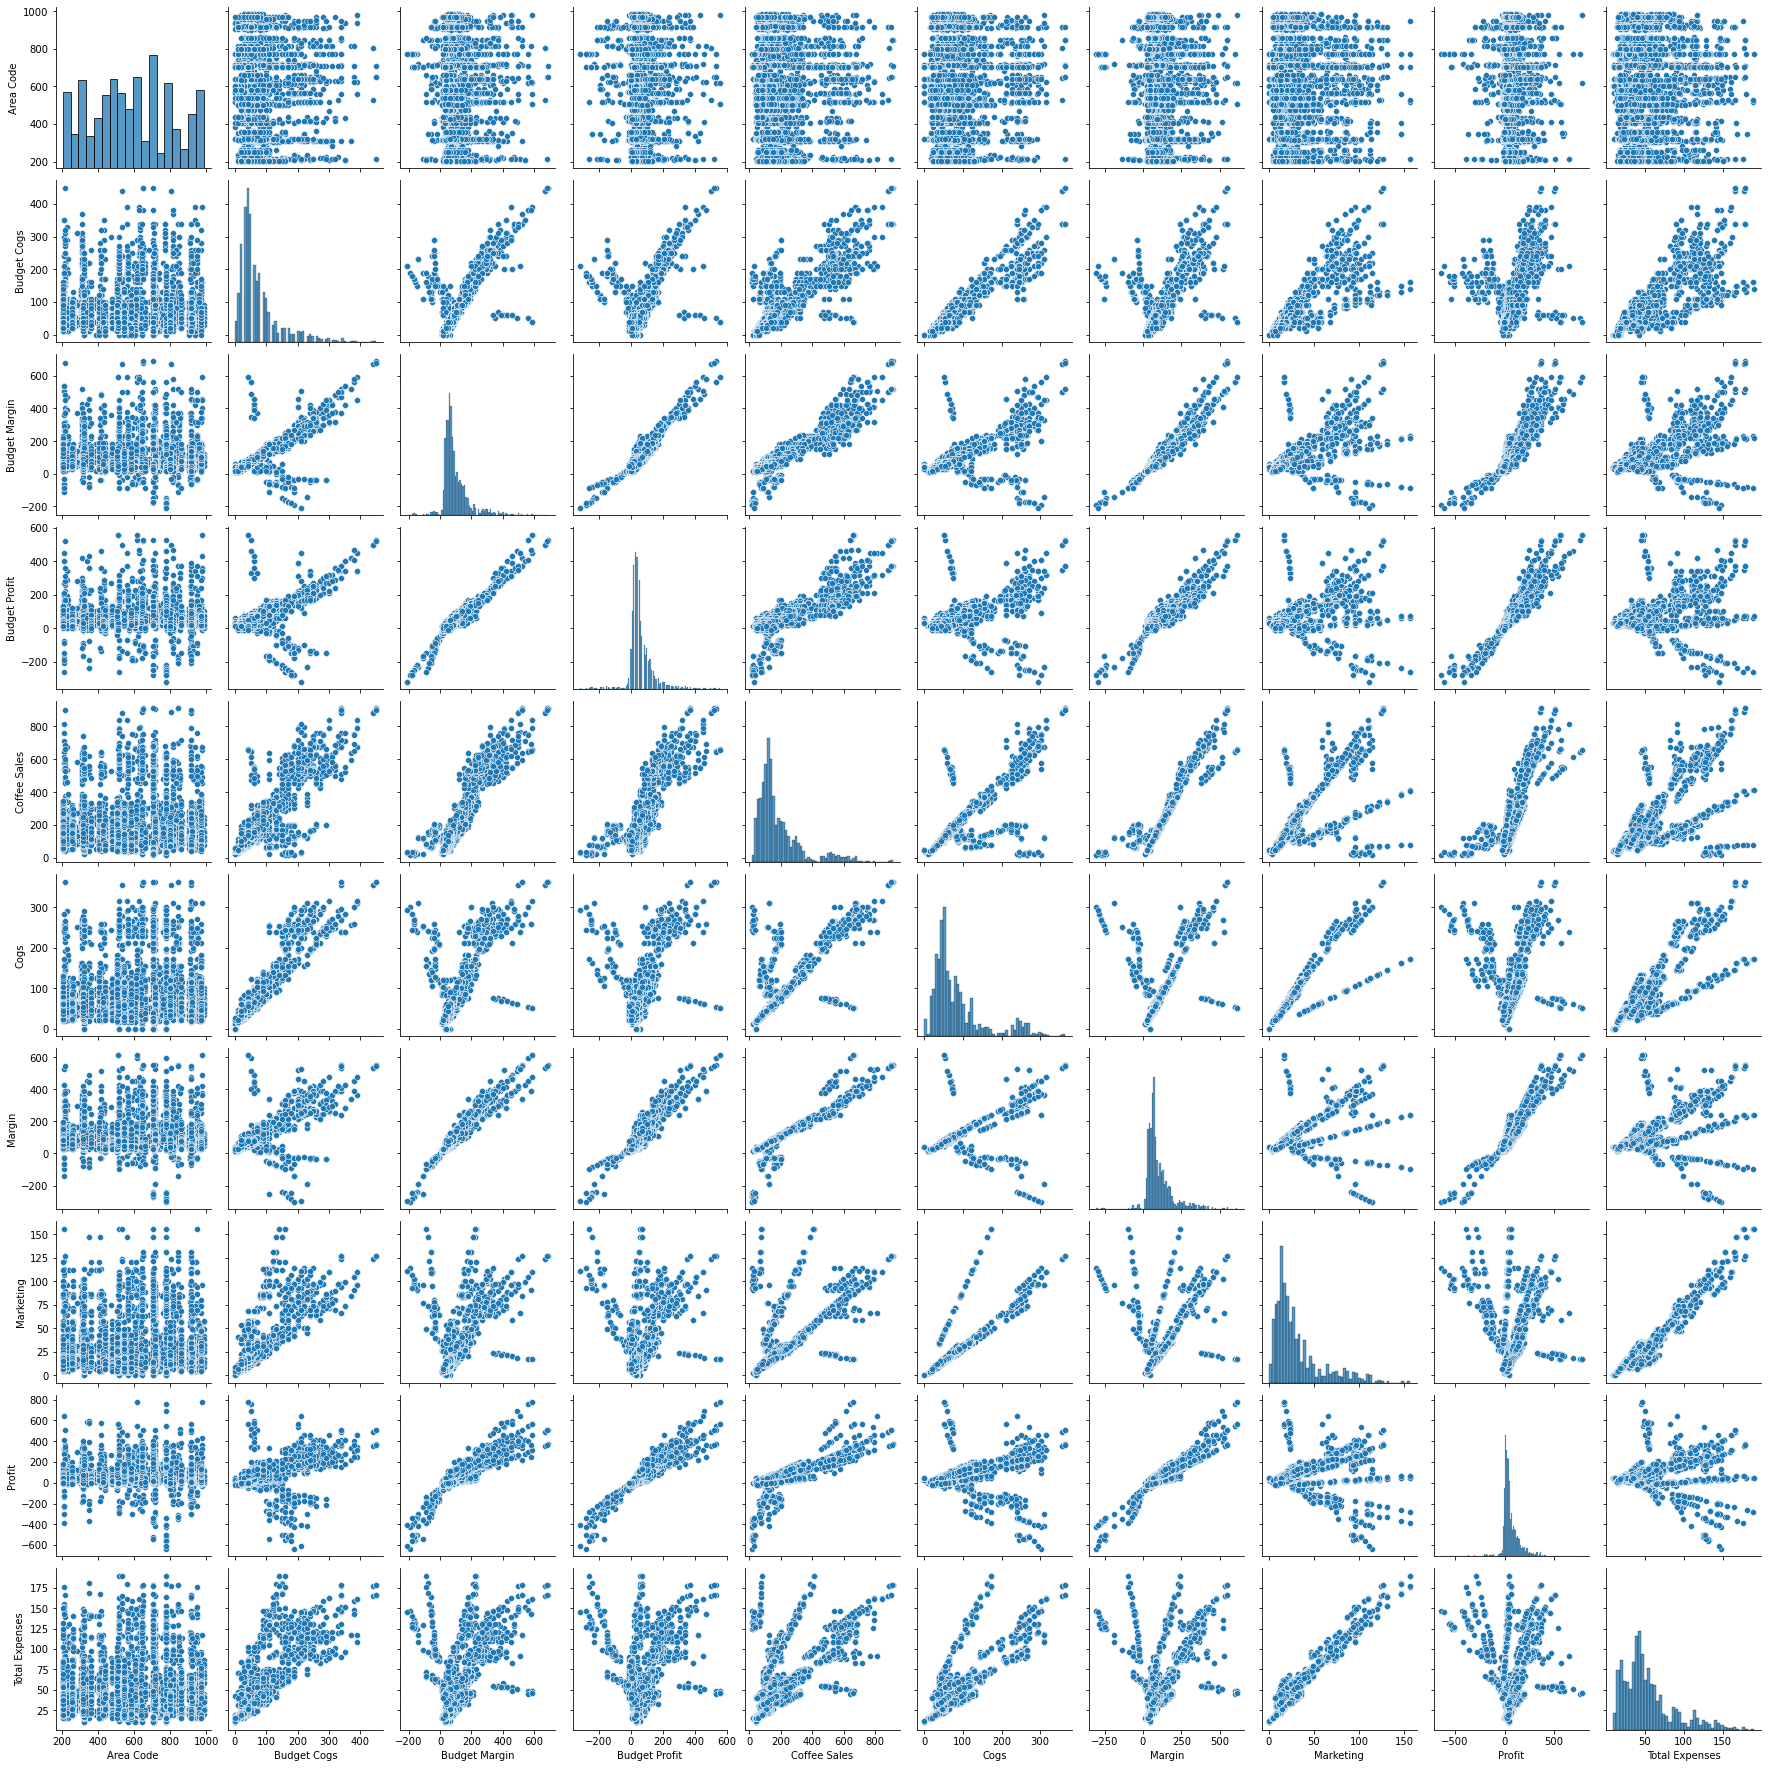

In [111]:
# Next I used the Seaborn pairplot() function to view the relationships between the variables
# This can give us a visual view of which variables have a linear model
sns.pairplot(df)

<p>
Since Total Expense will be my target variable, my biggest concern therefore will be the final row. I can see if not, but most features are able to resemble a linear line. Besides Area Code adnd Profit.
</p>

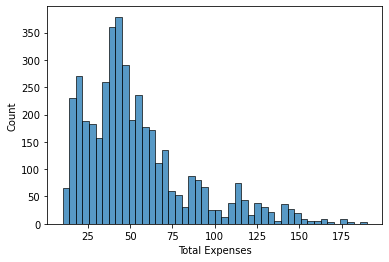

In [112]:
# Next since we are using Linear Regression to predict the Total Expenses 
# It will makes sense to exam the graph of Total Expense itself
sns.histplot(df['Total Expenses'])
plt.show()

<p>
Creating a distribution graph of my target variable, I am able to see if it is maintaining a normal distribution.
<br><br>
Looking at the graph, I can see it is slighlty positively skewed, telling me the overall mean of Total Expenses outweighs the median.
</p>

c:\Users\Dylan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


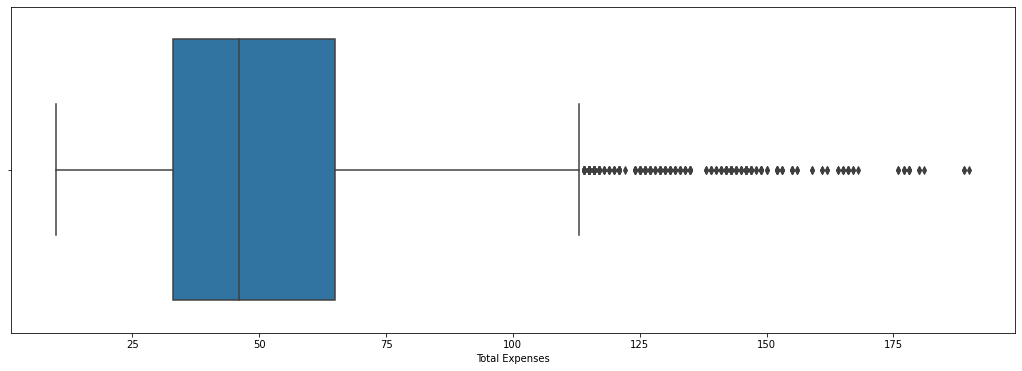

In [113]:
plt.subplots(figsize=(18, 6))
sns.boxplot(df['Total Expenses'])
plt.show()

<p>
Taking another step further, I wanted to see how it looks as a box plot. Bascially confirm the positive skewness of the target variable. Normally since the mean is a positive value, the postivie skew shouldnt be too alarming. However it's the immense amount outliers left over that might prove a problem.
</p>

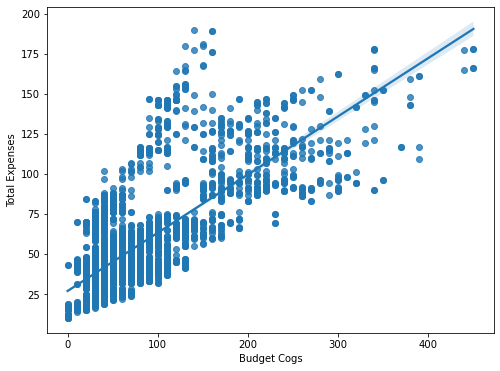

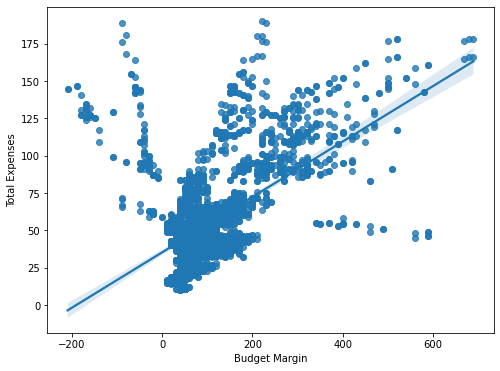

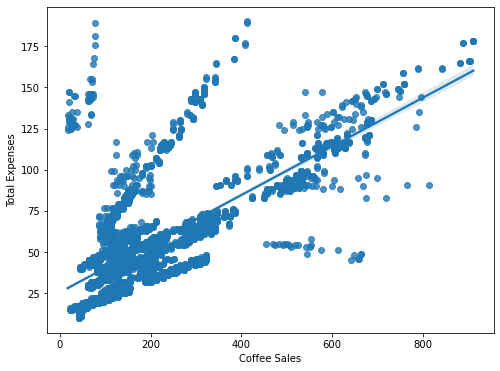

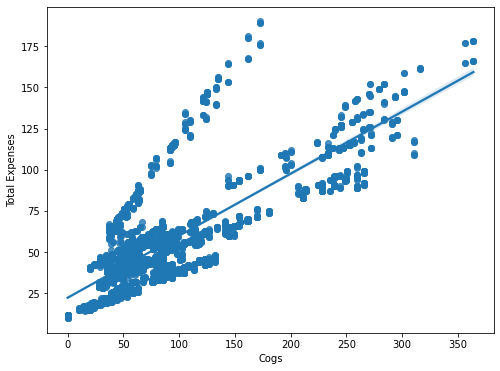

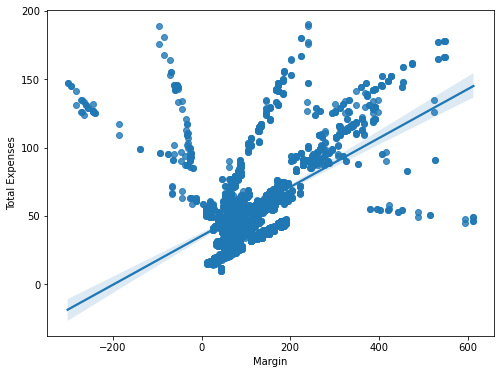

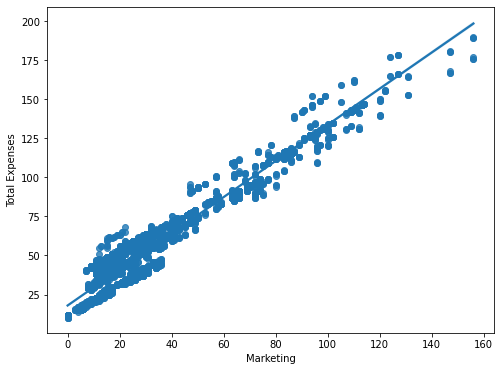

In [115]:
CoffeeChain_feature = ['Budget Cogs', 'Budget Margin','Coffee Sales','Cogs', 'Margin','Marketing']
for col in CoffeeChain_feature:
    plt.subplots(figsize=(8, 6))
    sns.regplot(x=col,y='Total Expenses',data=df)
    plt.show()

<p>
Next I wanted to view how all the features measure on a regression plot. I can see if not. but most share a regression, with the slight caviar, that some of them contain outliers from the regression line
</p>

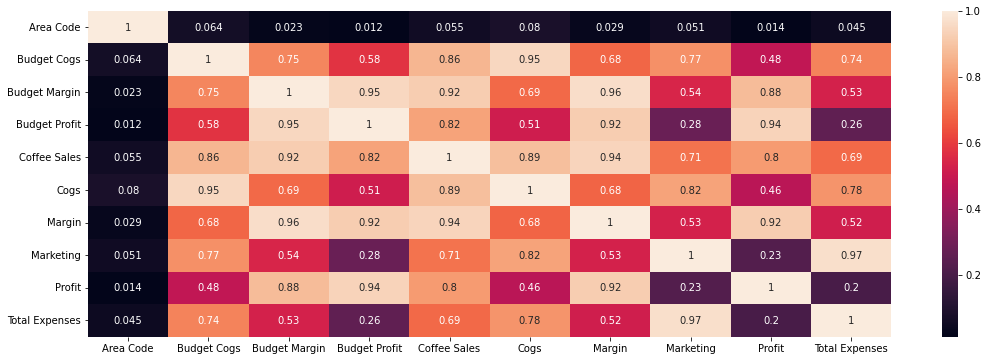

In [145]:
# Next is to find the correlation of all the columns in the dataframe
# All the variables that share a close correlation to our target (Total Expenses) will be our X values
plt.subplots(figsize=(18, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

<p>
In this case we see most share are a close correlation to Total Expenses, except Budget Profit and Profit, Budget Margin and the Margins
</p>

In [116]:
df_smogn = smogn.smoter(data=df, y='Total Expenses')

c:\Users\Dylan\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
r_index: 100%|##########| 659/659 [00:02<00:00, 236.05it/s]


<p>
Since there seems to be a lot of outlier values, the next logical step is to balance the data.
<br><br>
Because I am peforming a regression model. I will use the regression data balance library SMOGN (Synthetic Minority Over-Sampling Technique) to get this done.
</p>

In [117]:
df.shape

(4248, 19)

In [118]:
df_smogn.shape

(3515, 19)

<p>
With the balancing complete. I decided to take at the look of the differences between the shapes of the dataframe before balancing and the dataframe after balancing.
<br><br>
I can see the rows of imbalance of been amended. While the columns are still the same.
</p>

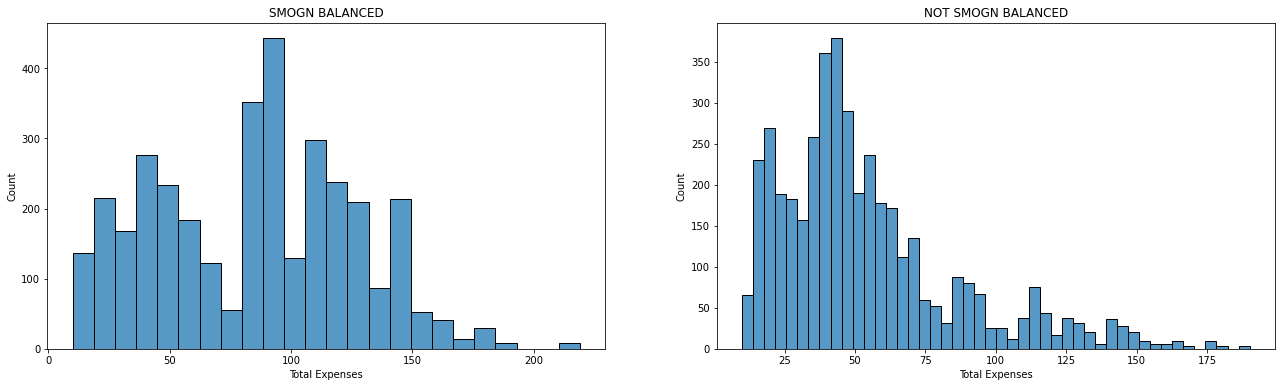

In [119]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(22, 6))
ax1.set_title('SMOGN BALANCED')
ax2.set_title('NOT SMOGN BALANCED')
sns.histplot(df_smogn['Total Expenses'], ax=ax1)
sns.histplot(df['Total Expenses'], ax=ax2)
plt.show()

<p>Now analyzing the two dataframe, I can the distribution is least bit less skewed after being SMOGN balanced.</p>

c:\Users\Dylan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Dylan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


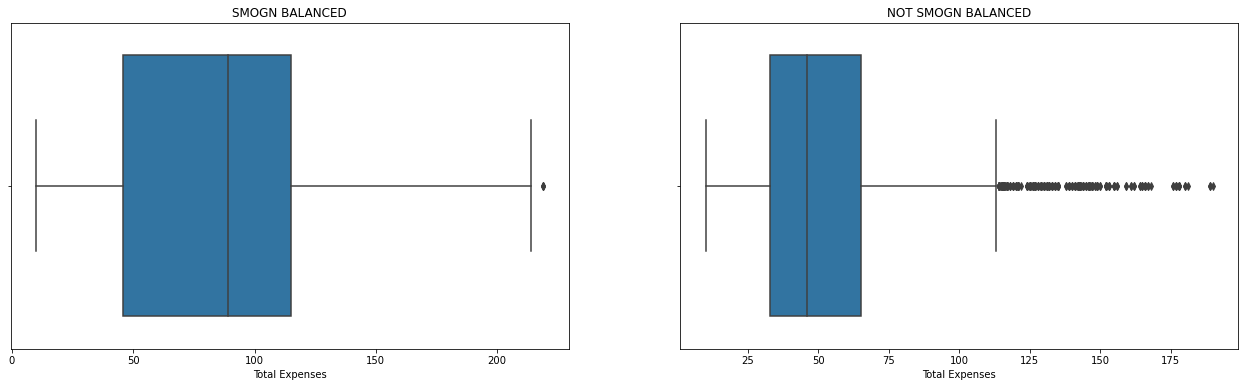

In [120]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(22, 6))
ax1.set_title('SMOGN BALANCED')
ax2.set_title('NOT SMOGN BALANCED')
sns.boxplot(df_smogn['Total Expenses'], ax=ax1)
sns.boxplot(df['Total Expenses'], ax=ax2)
plt.show()

<p>
Looking at the boxplot, the outliers have been taking care off, which is a good thing and was my biggest concern.
</p>

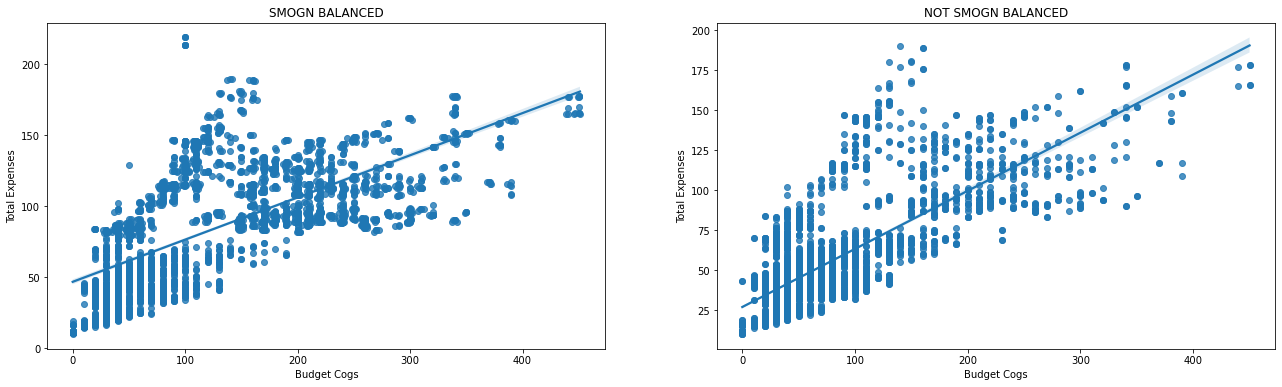

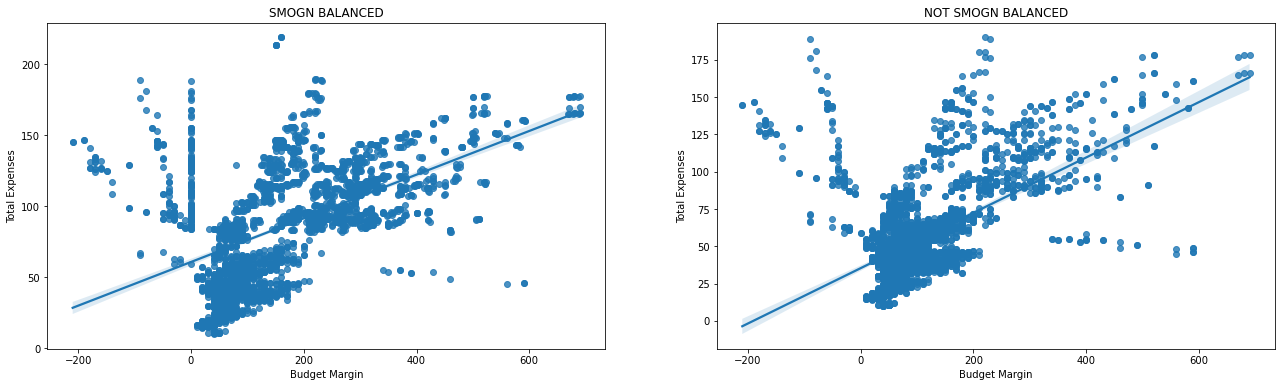

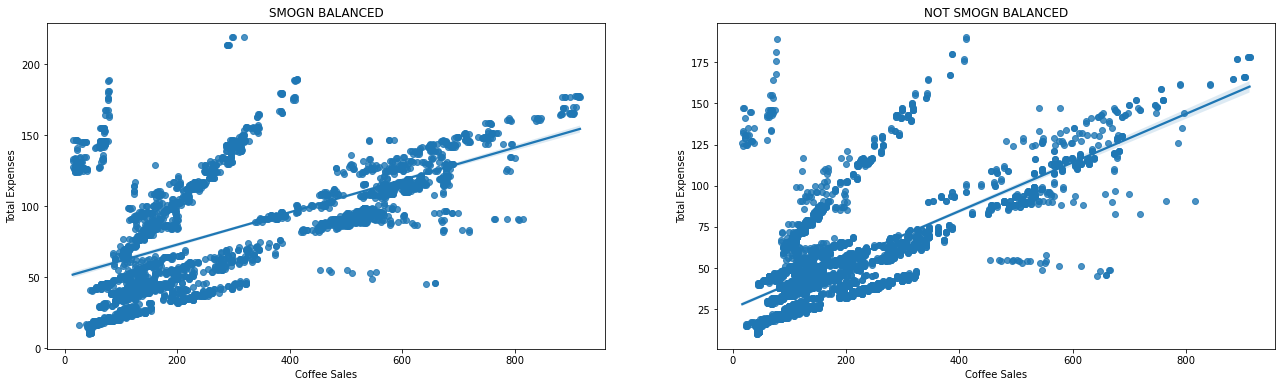

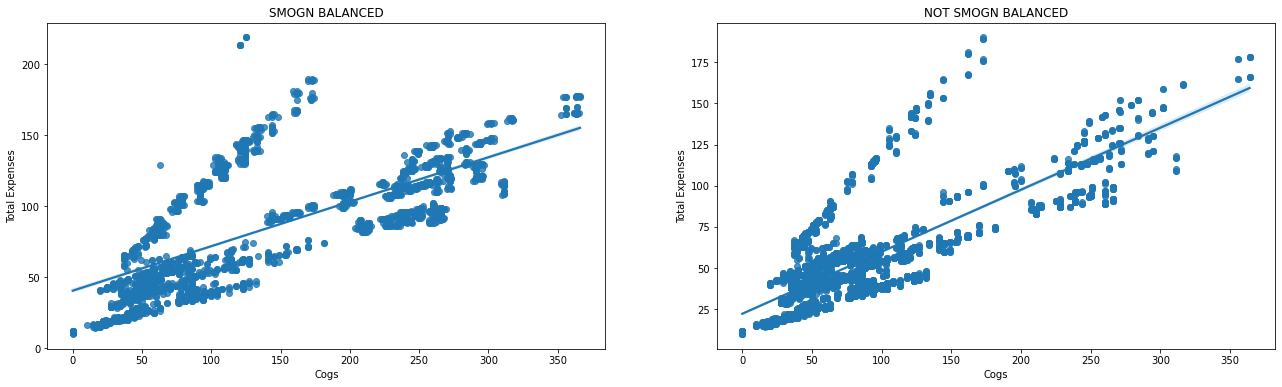

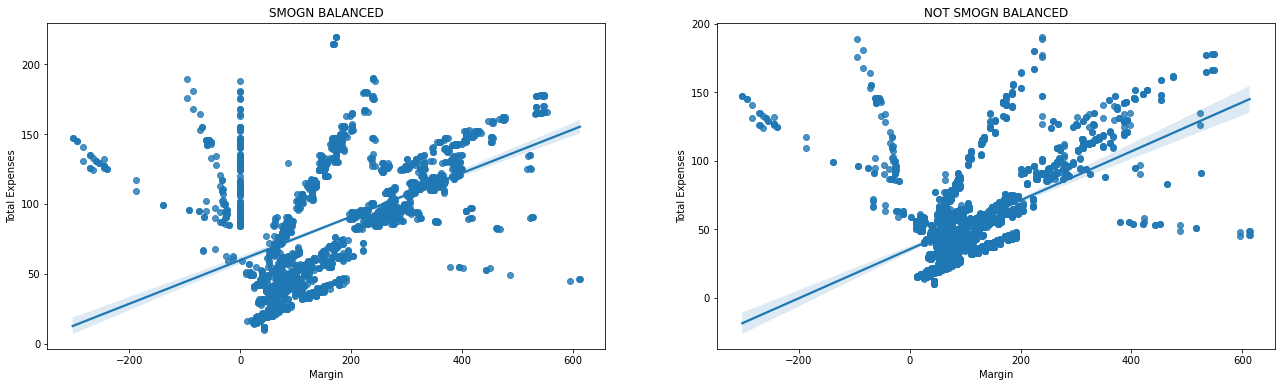

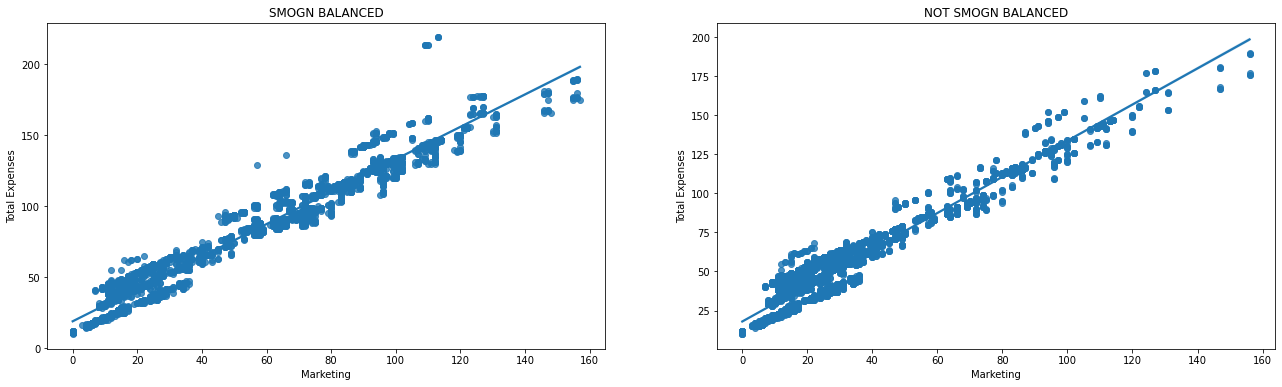

In [122]:
CoffeeChain_feature = ['Budget Cogs', 'Budget Margin','Coffee Sales','Cogs', 'Margin','Marketing']
for col in CoffeeChain_feature:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(22, 6))
    ax1.set_title('SMOGN BALANCED')
    ax2.set_title('NOT SMOGN BALANCED')
    sns.regplot(x=col,y='Total Expenses',data=df_smogn, ax=ax1)
    sns.regplot(x=col,y='Total Expenses',data=df, ax=ax2)
    plt.show()

<p>The reg plots are only slighly improved, which will mean not all features will be taken for the models</p>

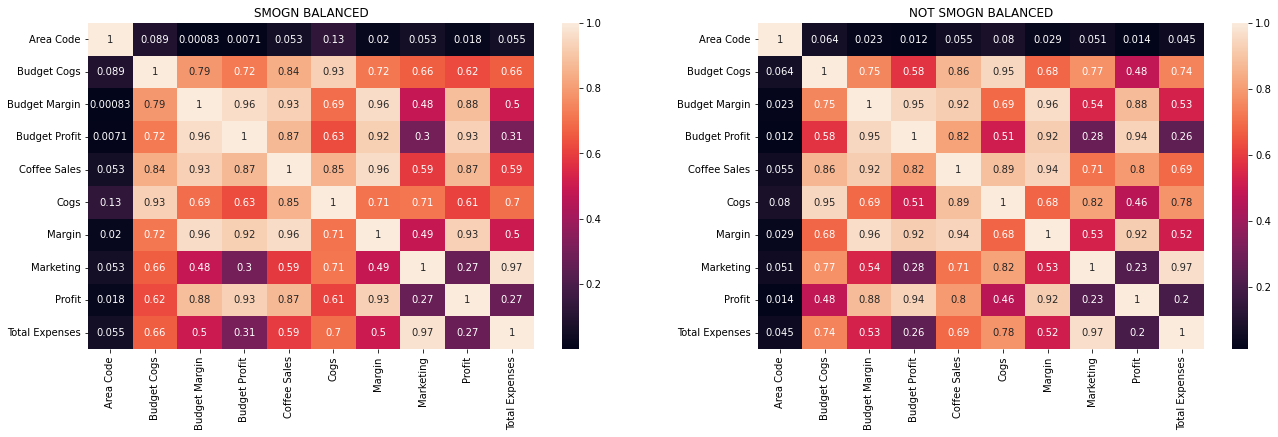

In [144]:
# Next is to find the correlation of all the columns in the dataframe
# All the variables that share a close correlation to our target (Total Expenses) will be our X values
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(22, 6))
ax1.set_title('SMOGN BALANCED')
ax2.set_title('NOT SMOGN BALANCED')
sns.heatmap(df_smogn.corr(), annot=True, ax=ax1)
sns.heatmap(df.corr(), annot=True, ax=ax2)
plt.show()

<p>
Analyzing the heatmaps I can the correlations have been changed, but not too drastically. I will therefore use the features that are mostly correlated to the target (Total Expenses)
</p>

***

## PreProcess + Splitting the data <a class="anchor" id="pre"></a>

With the data clean and our values analyzed, I then started Train and Test process

In [123]:
# With the data clean and our values analyzed, I then started Train and Test process
# First was to store all my X values in a variable named 'X'
# Then used the head() function to display the values  to confirm they were stored correctly

X = df_smogn[['Budget Cogs','Coffee Sales','Cogs','Marketing']]
X.head()

,Budget Cogs,Coffee Sales,Cogs,Marketing
0,42,140,64,56
1,50,150,63,57
2,53,143,62,56
3,52,157,67,58
4,62,152,65,57


In [124]:
# After that was to store the target variable Total Expenses in a variable named 'y'
y = df_smogn['Total Expenses']
y.head()

0    80
1    84
2    80
3    80
4    80
Name: Total Expenses, dtype: int64

In [125]:
# Now to actually train test and split the data
# This is done my using the sklearn.model selection method to import the train_test_split library
# From there we I called the train_test_split function and fed it the X and y values I captured 
# Also set test_size to 0.33 and random_state to 42 was per standard

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
    )

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

<p>
From there I called the train_test_split function and fed it the X and y values I captured. Also set test_size to 0.33 and random_state to 42. Common split = Train: 77%/Test: 33%
</p>

<p>The X_train and X_test variables will be properly scaled, since this is continous data, I opted to use a Standard Scaler</p>

***

## Training + Compiling the models <a class="anchor" id="model"></a>

In [126]:
# Calling the sklearn.linear_model method and importing the LinearRegression library with will perfrom the linear regression
# fit() will pefrom the actuall training and testing

lr = LinearRegression().fit(X_train,y_train)
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123).fit(X_train,y_train)
d_tree = DecisionTreeRegressor().fit(X_train, y_train)

[13:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


<p>
For this notebook I will create a:
<ul>
    <li>Linear Regression model</li>
    <li>XGBooster Regression model</li>
    <li>Decision Tree Regression model</li>
</ul>
</p>

***

## Evaluating the Linear Regression model <a class="anchor" id="linear"></a>


<p>
Since the evaluation for the models will more or less follow the same format. I decided to create a custome definition that will handle all three models.
</p>

In [128]:
def reg_evalutation(X_train, y_train,X_test,y_test ,model):
    predictions = model.predict(X_test)
    
    plt.subplots(figsize=(8, 6))
    sns.regplot(x=predictions, y= y_test, color="b")
    plt.show()
    
    print('----------------------------------------------------------------')
    print("Training set score: {:2f}".format(model.score(X_train,y_train)))
    print("Test set score: {:2f}".format(model.score(X_test,y_test)))
    print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE: ',metrics.mean_squared_error(y_test,predictions))
    print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    if str(model) == 'LinearRegression()':
        print("Intercept: ", model.intercept_)
        print('----------------------------------------------------------------')
        cdf = pd.DataFrame(model.coef_,X.columns,columns=['Coeff'])
        print(cdf)
    print('----------------------------------------------------------------')
    df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    print(df2) 
    

<p>The definition will be used to display a regression plot to view how the predictions measure against the test values. And diplay the accuracy metrics of the model.
<br><br>
As well as the Mean absolute error, Mean Squared Error and the Root Mean Squared Error.
<br><br>
The error metrics will indicate how many errors the model experience while the model was compiling itself. Ideally I will want those metrics to be at their lowest.
<br><br>
Finally for the Linear Regression model, there will also be statements used to display the intercept and coefficient of the model.
</p>

Now lets Evaluate if the model has pefromed correctly for a Linear Regression

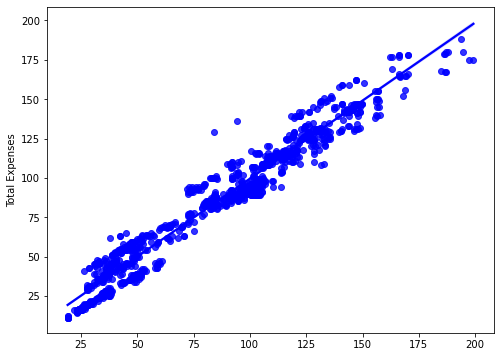

----------------------------------------------------------------
Training set score: 0.950262
Test set score: 0.954918
MAE:  6.942393997025744
MSE:  75.81711265932769
RMSE:  8.70730226070783
Intercept:  84.70191082802548
----------------------------------------------------------------
                  Coeff
Budget Cogs    3.101816
Coffee Sales   2.088107
Cogs          -4.549498
Marketing     40.235484
----------------------------------------------------------------
      Actual   Predicted
2082      36   38.922944
70        88   84.430164
358      115  128.431817
325      106   91.782876
1564     159  144.067040
...      ...         ...
694       33   44.254490
1608     128  128.004604
1460      34   44.603391
1102     114  113.111934
3317      22   30.194430

[1160 rows x 2 columns]


In [129]:
display(HTML("<h1>Linear Regression Model</h1>"))
reg_evalutation(X_train, y_train,X_test,y_test ,lr)

<p>
So, Recap of the Linear Regression Model.
<ul>
    <li>Accuracy Training Score: 95.02%</li>
    <li>Accuracy Test Score: 95.49%</li>
</ul>
<ul>
    <li>MAE: 6.9</li>
    <li>MSE: 75.81</li>
    <li>RMSE: 8.70</li>
    <li>Intercept: 84.70%</li>
</ul>
mean_absolute_error produces the value of 6.9 (or 7 to round up) this tells us the model is 93% correct.
<br>
Looking at the Coefficents I can see:
<ul>
    <li>Budget Cogs: 3.10</li>
    <li>Coffee Sales: 2.08</li>
    <li>Cogss: -4.54</li>
    <li>Marketing: 40.23</li>
</ul>
<br>
With coefficients associated with the features. This tells me whenever either of these features variables increment by one unit, the target variable (Total Expenses) is effect by the associated feature values. This means not only can the model be used for expense predictions, but the coffecients can tell me what features playing the biggest contribution to the expenses.
<br><br>
I can marketing is playing the biggest contributions to the coffee chain's expense, which makes sense, marketing is renown for being costly.
<br><br>
All in all the Linear Regression model proved quite successful. However I want to see if the accuracy can be finer tunned with other models
</p>

***

Now lets Evaluate if the model has pefromed correctly for a XGBoost Regression 

## Evaluating the XGBoost Regression model <a class="anchor" id="xgb"></a>

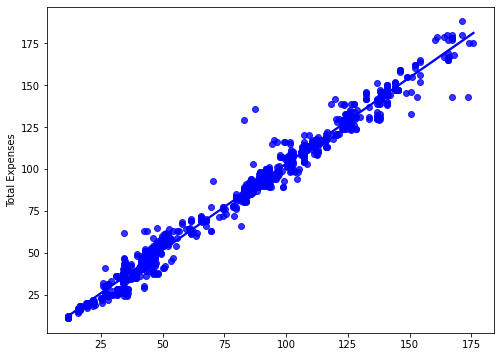

----------------------------------------------------------------
Training set score: 0.981853
Test set score: 0.979501
MAE:  4.222140664067761
MSE:  34.474567394590515
RMSE:  5.871504695952352
----------------------------------------------------------------
      Actual   Predicted
2082      36   40.987770
70        88   83.806068
358      115  112.370201
325      106  102.163651
1564     159  146.175095
...      ...         ...
694       33   34.263508
1608     128  122.943741
1460      34   34.263508
1102     114  111.444298
3317      22   21.829107

[1160 rows x 2 columns]


In [130]:
display(HTML("<h1>XGBoost Regression Model</h1>"))
reg_evalutation(X_train, y_train,X_test,y_test ,xgb_r)

<p>
So, Recap of the XGBoost Regression Model.
<br><br>
Look at the regression plot alone, I can visually spot the difference in accuracy. With XGBoost the variable are even closer to the linear line, producing an even more accurate model.
<ul>
    <li>Accuracy Training Score: 98.18%</li>
    <li>Accuracy Test Score: 97.95%</li>
</ul>
<ul>
    <li>MAE: 4.22</li>
    <li>MSE: 34.47</li>
    <li>RMSE: 5.87</li>
</ul>
mean_absolute_error produces the value of 4.2 (or 4 to round up) this tells us the model is 96% correct.
<br><br>
The XGBoost proved to be more accurate, which will make it a better chose for the expense predictions. However I want to try one more model before deciding.
</p>

***

Now lets Evaluate if the model has pefromed correctly for a Decision Tree Regression 

## Evaluating the Decision Tree Regression model <a class="anchor" id="decision"></a>

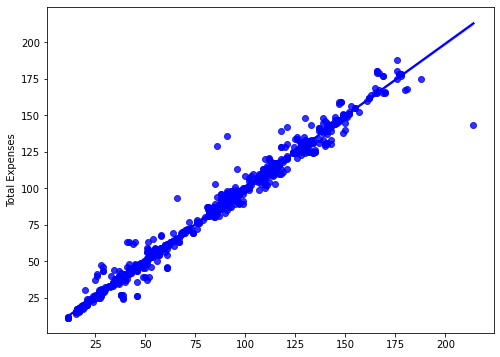

----------------------------------------------------------------
Training set score: 0.996878
Test set score: 0.985427
MAE:  2.213835838491011
MSE:  24.507632141084837
RMSE:  4.950518370947111
----------------------------------------------------------------
      Actual   Predicted
2082      36   46.000000
70        88   87.000000
358      115  115.000000
325      106  110.000000
1564     159  148.000000
...      ...         ...
694       33   33.000000
1608     128  124.333333
1460      34   34.000000
1102     114  115.000000
3317      22   21.000000

[1160 rows x 2 columns]


In [131]:
display(HTML("<h1>Decision Tree Regression Model</h1>"))
reg_evalutation(X_train, y_train,X_test,y_test ,d_tree)

<p>
So, Recap of the Decision Tree Regression Model.
<br><br>
Looking at the regression plot for Decision Tree proves to be even more accurate.
<ul>
    <li>Accuracy Training Score: 99.68%</li>
    <li>Accuracy Test Score: 98.54%</li>
</ul>
<ul>
    <li>MAE: 2.21</li>
    <li>MSE: 24.50</li>
    <li>RMSE: 4.95</li>
</ul>
mean_absolute_error produces the value of 2.21 (or 2 to round up) this tells us the model is 98% correct.
<br><br>
The Decision Tree Regression was a good idea to try, as out of the three, has proven to be the most accurate. Making it the ideal choice for the Expense predictions.
</p>

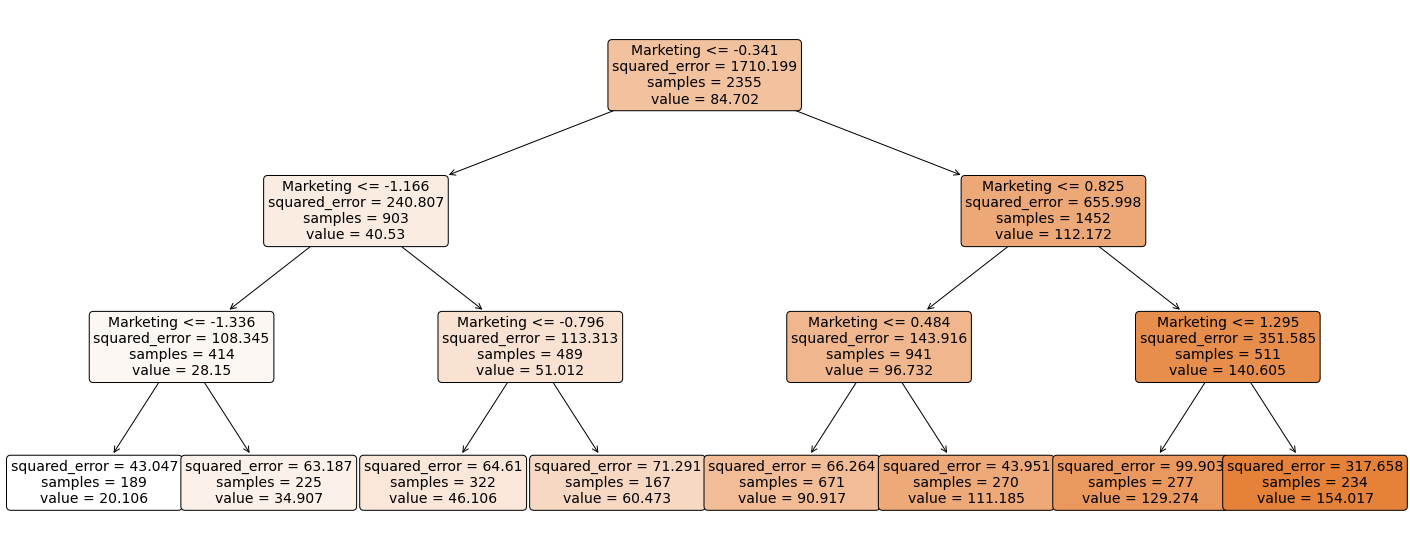

In [132]:
from sklearn import tree
from sklearn.tree import plot_tree
d_tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

plt.figure(figsize=(25,10))
a = plot_tree(d_tree, 
              feature_names=X.columns, 
              class_names='Total Expense', 
              filled=True, 
              rounded=True, 
              fontsize=14)

<p>
As the final closing point. I wanted to take a look (at the first 3 levels at least) of the decision and visualize it 
</p>

***